In [ ]:
# 
# For this problem you are going to use the wine dataset in UCI’s repository, available 
# from  OA 7.10. The dataset contains 178 records on wine; the attributes are the analysis 
# results  of different chemicals. Use the MeanShift algorithm to group the wines that 
# have similar  chemical components. Report the number of clusters and numbers of wine 
# records in each  type. 
# 

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

# Load and format the dataset
class_names = {1: 'Low', 2: 'Medium', 3: 'High'}
colnames = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
            'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('../Datasets/Code_and_Data_(Chapter_07)/Code and Data (Chapter 07)/wine.data', names=colnames)

# Isolate the feature set and target variable
X = df.drop(columns='Class')
y = df.Class

Number of estimated clusters: 3


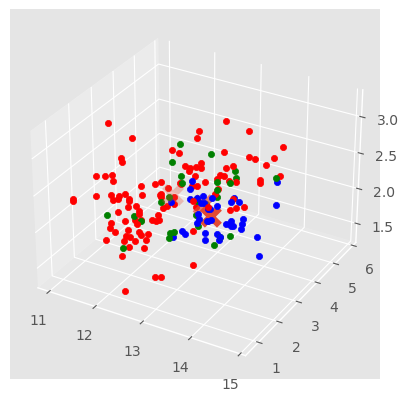

In [17]:

ms = MeanShift()
ms.fit(X)
centroids = ms.cluster_centers_
labels = ms.labels_

# Can print the results, but this creates a lot of noise so I have commented it out
# print(centroids)
# print(labels)

# Print the amount of clusters created
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

# Configure the plot
style.use("ggplot")
centers = [[1, 1, 1], [5, 5, 5], [3, 10, 10]]
colors = ['r', 'g', 'b', 'c', 'k', 'y', 'm']
fig = plt.figure()

# Add a 3D subplot to the figure. '111' means 1x1 grid, first subplot.
ax = fig.add_subplot(111, projection='3d')

# Loop through each point in the dataset (X) to plot them.
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

# Plot the centroids of the clusters.
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker="x", s=150, linewidths=5, zorder=10)
plt.show()